<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW4/problem2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
# read csv
df  = pd.read_csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW4/nutrition_subset.csv");
df

,food_item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


In [22]:
#checking how many ? is available in dataset 
print("agfood iteme: ",df['food_item'].isin(['?']).sum())
print("weight_in_grams: ",df.weight_in_grams.isin(['?']).sum())
print("saturated_fat: ",df.saturated_fat.isin(['?']).sum())
print("cholesterol: ",df.cholesterol.isin(['?']).sum())


agfood iteme:  0
weight_in_grams:  0
saturated_fat:  0
cholesterol:  0


In [23]:
# check null values
df.isnull().sum()

food_item          0
weight_in_grams    0
saturated_fat      0
cholesterol        0
dtype: int64

# 3. Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.

In [24]:
#sorting in descending order to get highest items at top 
df_fooditem5 = df.sort_values(by=['saturated_fat'],ascending=False).iloc[0:5]
df_fooditem5.reset_index(drop=True,inplace=True)
df_fooditem5

,food_item,weight_in_grams,saturated_fat,cholesterol
0,CHEESECAKE 1 CAKE,1110.0,119.9,2053
1,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
2,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
3,CREME PIE 1 PIE,910.0,90.1,46
4,LARD 1 CUP,205.0,80.4,195


food item 'CHEESECAKE 1 CAKE' has the highest cholesterol

# 4. Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?

In [25]:
df['saturated_fat_per_gram']=df['saturated_fat']/df['weight_in_grams']
df

,food_item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000
...,...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0,0.000000
957,TEA; BREWED 8 FL OZ,240.00,0.0,0,0.000000
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0,0.000000
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0,0.000000


In [26]:
#sorting in descending order to get highest items at top 
df_fooditem5_2 = df.sort_values(by=['saturated_fat_per_gram'],ascending=False).iloc[0:5]
df_fooditem5_2.reset_index(drop=True,inplace=True)
df_fooditem5_2

,food_item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
1,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
2,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
3,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
4,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


#5. Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram

In [27]:
mean = df.saturated_fat_per_gram.mean()
std = df.saturated_fat_per_gram.std()
df.saturated_fat_per_gram = (df.saturated_fat_per_gram-mean)/std
df

,food_item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,-0.562043
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,-0.135330
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,-0.562043
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,2.318264
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,2.326185
...,...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0,-0.562043
957,TEA; BREWED 8 FL OZ,240.00,0.0,0,-0.562043
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0,-0.562043
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0,-0.562043


In [28]:
q1,q3 = np.percentile(df.saturated_fat_per_gram,[25,75])
IQR = q3-q1
IQR
#lower and upper bound of outliers
lower_bound=q1-(1.5 * IQR)
upper_bound=q3 +(1.5 * IQR)
print('lower_bound',lower_bound)
print('upper_bound',upper_bound)


lower_bound -1.6359856281662282
upper_bound 1.227862506276029


In [29]:
df.loc[(df.saturated_fat_per_gram<lower_bound) | (df.saturated_fat_per_gram> upper_bound) ]

,food_item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,2.318264
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,2.326185
5,PARMESAN CHEESE; GRATED 1 TBSP,5.00,1.0,4,2.462280
18,PORK; CURED; BACON; REGUL;CKED3 SLICE,19.00,3.3,16,2.064343
36,SWISS CHEESE 1 OZ,28.35,5.0,26,2.104908
...,...,...,...,...,...
930,WHIPPING CREAM; UNWHIPED;LIGHT1 TBSP,15.00,2.9,17,2.361469
936,IMITATN WHIPD TOPING;PRESSRZD 1 TBSP,4.00,0.8,0,2.462280
939,SOUR CREAM 1 TBSP,12.00,1.6,5,1.454172
940,LIGHT; COFFEE OR TABLE CREAM 1 TBSP,15.00,1.8,10,1.252551


There are 85 outliers for saturated_fat_per_gram

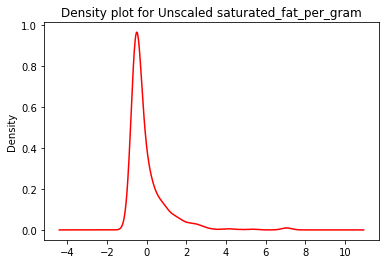

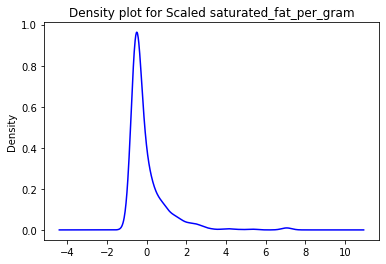

In [30]:
from scipy import stats
# Standardize (zero mean)
df['scaled_saturated_fat_per_gram'] = stats.zscore(df.saturated_fat_per_gram, nan_policy='omit')

df.saturated_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Unscaled saturated_fat_per_gram')
plt.show()

df.scaled_saturated_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for Scaled saturated_fat_per_gram')
plt.show()

# 6. Are there any missing values? If so, impute as necessary and explain your approach. 

In [31]:
# check null values
df.isnull().sum()

food_item                        0
weight_in_grams                  0
saturated_fat                    0
cholesterol                      0
saturated_fat_per_gram           0
scaled_saturated_fat_per_gram    0
dtype: int64

#7. Standardize (zero mean) the numeric variables, and determine if there are any outliers. 

In [32]:
df['weight_in_grams'].describe()

count     961.000000
mean      149.409365
std       175.909357
min         0.400000
25%        32.000000
50%       113.000000
75%       218.000000
max      1542.000000
Name: weight_in_grams, dtype: float64

In [33]:
mean = df.weight_in_grams.mean()
std = df.weight_in_grams.std()
df.weight_in_grams = (df.weight_in_grams-mean)/std

q1,q3 = np.percentile(df.weight_in_grams,[25,75])
IQR = q3-q1
IQR
#lower and upper bound of outliers
lower_bound=q1-(1.5 * IQR)
upper_bound=q3 +(1.5 * IQR)
print('lower_bound',lower_bound)
print('upper_bound',upper_bound)
df.loc[(df.weight_in_grams<lower_bound) | (df.weight_in_grams> upper_bound)]


lower_bound -2.2534865277621754
upper_bound 1.975964448051177


,food_item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_saturated_fat_per_gram
351,POUND CAKE; FROM HOME RECIPE 1 LOAF,2.072605,21.1,555,0.058708,0.058739
361,CUSTARD PIE 1 PIE,4.323765,33.7,1010,-0.002044,-0.002045
365,ANGELFOOD CAKE; FROM MIX 1 CAKE,2.760459,0.4,0,-0.552517,-0.552805
376,FRUITCAKE;DARK; FROM HOMERECIP1 CAKE,6.887585,47.6,640,-0.033175,-0.033192
378,CHEESECAKE 1 CAKE,5.460714,119.9,2053,1.071364,1.071922
384,POUND CAKE; COMMERCIAL 1 LOAF,1.993019,52.0,1100,1.010605,1.011131
386,PECAN PIE 1 PIE,3.840561,28.1,569,-0.046991,-0.047016
406,SHEETCAKE W/O FRSTNG;HOMERECIP1 CAKE,3.567693,29.5,552,0.012073,0.012079
410,DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE,5.443659,55.6,598,0.197453,0.197556
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,7.882415,66.0,1183,0.087714,0.087760


There are 707 outliers for weight_in_grams

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


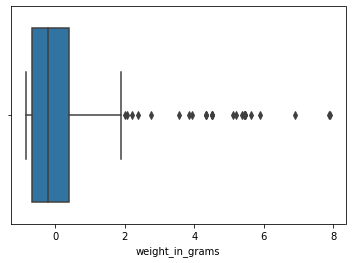

In [34]:
sns.boxplot(df['weight_in_grams'])

In [35]:
df['cholesterol'].describe()

count     961.00000
mean       32.55359
std       119.96059
min         0.00000
25%         0.00000
50%         0.00000
75%        20.00000
max      2053.00000
Name: cholesterol, dtype: float64

In [36]:
mean = df.cholesterol.mean()
std = df.cholesterol.std()
df['cholesterol1'] = (df.cholesterol-mean)/std

q1,q3 = np.percentile(df.cholesterol1,[25,75])
IQR = q3-q1
IQR
#lower and upper bound of outliers
lower_bound=q1-(1.5 * IQR)
upper_bound=q3 +(1.5 * IQR)
print('lower_bound',lower_bound)
print('upper_bound',upper_bound)
df.loc[(df.cholesterol1<lower_bound) | (df.cholesterol1> upper_bound)]

lower_bound -0.5214511688177438
upper_bound 0.14543451269917645


,food_item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_saturated_fat_per_gram,cholesterol1
4,PARMESAN CHEESE; GRATED 1 CUP,-0.280880,19.1,79,2.326185,2.327397,0.387181
7,LAMB;CHOPS;ARM;BRAISED;LEAN 1.7 OZ,-0.576486,2.9,59,0.351555,0.351738,0.220459
11,BUTTERMILK; DRIED 1 CUP,-0.167185,4.3,83,-0.020185,-0.020195,0.420525
13,PORK SHOULDER; BRAISD; LEAN 2.4 OZ,-0.468476,2.8,76,0.069905,0.069942,0.362172
14,BEEF; CKD;BTTM ROUND;LEAN ONLY2.8 OZ,-0.405944,2.7,75,-0.038602,-0.038622,0.353836
...,...,...,...,...,...,...,...
599,HOLLANDAISE SCE; W/ H2O;FRM MX1 CUP,0.622995,11.6,52,0.115219,0.115279,0.162107
696,SHERBET; 2% FAT 1/2 GAL,7.916524,19.0,113,-0.375719,-0.375915,0.670607
709,BUTTER; SALTED 1/2 CUP,-0.206978,57.1,247,7.079055,7.082741,1.787641
710,BUTTER; UNSALTED 1/2 CUP,-0.206978,57.1,247,7.079055,7.082741,1.787641


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


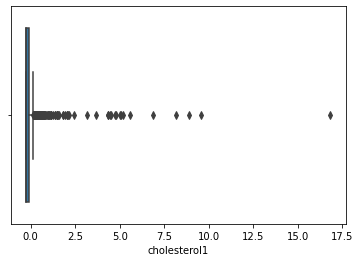

In [37]:
sns.boxplot(df['cholesterol1'])

There are 146 otliers for cholesterol

**Summary**
1. There is no missing value/null value/unknown value in dataset
2. food item 'CHEESECAKE 1 CAKE' has the highest saturated_fat
3. food item 'BUTTER; SALTED 1 TBSP' has the highest saturated_fat in per gram.
4. There are 85 outliers for saturated_fat_per_gram
5. There are 27 outliers for weight_in_grams and 146 for cholesterol.